<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

### Import Boston housing dataset

In [14]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [15]:
# take a look at the data

print(f'Training data : {X_train.shape}')
print(f'Test data : {X_test.shape}')
print(f'Training sample : {X_test[0]}')
print(f'Training target sample : {y_train[0]}')

Training data : (404, 13)
Test data : (102, 13)
Training sample : [ 18.0846   0.      18.1      0.       0.679    6.434  100.       1.8347
  24.     666.      20.2     27.25    29.05  ]
Training target sample : 15.2


### Standardize data

In [16]:
#calculate the means and standard deviations of features
means = X_train.mean(axis=0)
std = X_train.std(axis=0)

#subtract the means and divide by stddev to standardize
# values now represent # of stddevs from the mean
X_train = X_train - means
X_train = X_train / std

X_test = X_test - means
X_test = X_test / std

### Import model and layers from Keras

In [5]:
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Instantiate a model object, add layers, and compile

In [11]:
boston_model = Sequential()

In [12]:
# Input --> Hidden
boston_model.add(Dense(16, input_dim=13, activation='relu'))

# Hidden
boston_model.add(Dense(16, activation='relu'))

# Output layer
boston_model.add(Dense(1, activation='linear'))

boston_model.compile(loss='mean_squared_error', 
                     optimizer='adam', 
                     metrics=['mean_squared_error'])

boston_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = boston_model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=.1, verbose=0)
scores = boston_model.evaluate(X_test, y_test)
print(f'{boston_model.metrics_names[1]}: {scores[1]*100}')

102/102 [==============================] - 0s 43us/sample - loss: 16.3705 - mean_squared_error: 16.3705
mean_squared_error: 1637.0452880859375


In [23]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

### Plot the model loss from history.history

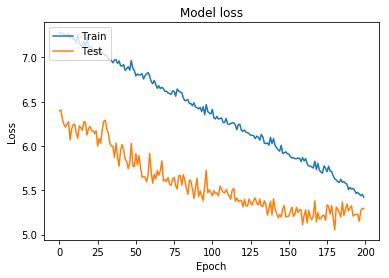

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Linear regression on same data

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
y_pred = model.predict(X_test)

### Accuracy comparison

In [33]:
# MSE
# -----------------------------------
# Keras: 16.3705
# LinearRegression: 23.19559925642299

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

23.19559925642299

### Try some feature engineering

### Check which model sees a greater accuracy boost

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [ ]:
##### Your Code Here #####

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.